## Observations and Insights 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Optional: Get all the data for the duplicate mouse ID. 
drop_dup_mouse_id = mouse_metadata.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

clean_study_results = study_results[study_results['Mouse ID'].isin(drop_dup_mouse_id)==False]
clean_mouse_df = mouse_metadata[mouse_metadata['Mouse ID'].isin(drop_dup_mouse_id)==False]

#combine the dataframes using Mouse ID # Combine the data into a single dataset

combined_data = pd.merge(clean_study_results, clean_mouse_df, on = "Mouse ID")
#combined_data.head()
#sort by Timepoint ???

#sort_by_time = combined_data.sort_values("Timepoint", ascending= True)


In [66]:
# greatest timepoint for each mouse



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [98]:
# Checking the number of mice in the clean DataFrame.
combined_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,19.556559,50.431117,1.022836,12.787042,25.655337
std,14.076320,8.901081,1.140506,7.198698,3.930812
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.937012,1.000000,13.000000,26.000000
75%,30.000000,56.287906,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


## Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_response_mean_df = pd.DataFrame(combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
tumor_response_mean_df = tumor_response_mean_df.reset_index()
# Preview DataFrame
tumor_response_mean_df


,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.367503
5,Placebo,54.033581
6,Propriva,52.322552
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [100]:
tumor_response_median_df = pd.DataFrame(combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
tumor_response_median_df = tumor_response_median_df.reset_index()
# Preview DataFrame
tumor_response_median_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.854632
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [101]:
tumor_response_var_df = pd.DataFrame(combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
tumor_response_var_df = tumor_response_var_df.reset_index()
# Preview DataFrame
tumor_response_var_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,67.233750
5,Placebo,61.168083
6,Propriva,42.351070
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [102]:
tumor_response_std_df = pd.DataFrame(combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
tumor_response_std_df = tumor_response_std_df.reset_index()
# Preview DataFrame
tumor_response_std_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.199619
5,Placebo,7.821003
6,Propriva,6.507770
7,Ramicane,4.846308
8,Stelasyn,7.710419
9,Zoniferol,6.966589


In [103]:
tumor_response_sem_df = pd.DataFrame(combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
tumor_response_sem_df = tumor_response_sem_df.reset_index()
# Preview DataFrame
tumor_response_sem_df

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.618070
5,Placebo,0.581331
6,Propriva,0.512884
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [104]:
tumor_response_sem = combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
tumor_response_std = combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_response_var = combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_response_median = combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_response_mean = combined_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
summary_stats_df= pd.DataFrame({"mean": tumor_response_mean,
                               "median": tumor_response_median,
                               "variance" : tumor_response_var,
                               "standard dev" : tumor_response_std,
                               "sem" : tumor_response_sem})
summary_stats_df

,mean,median,variance,standard dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.367503,52.509285,67.233750,8.199619,0.618070
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [105]:
summary_stats_df.sort_values(by=["mean", "median"], ascending = True)

,mean,median,variance,standard dev,sem
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.367503,52.509285,67.233750,8.199619,0.618070


## Bar Plots

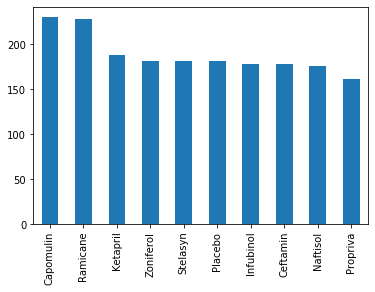

In [106]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pandas.

mice_count = combined_data['Drug Regimen'].value_counts()
mice_count.plot(kind = "bar")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

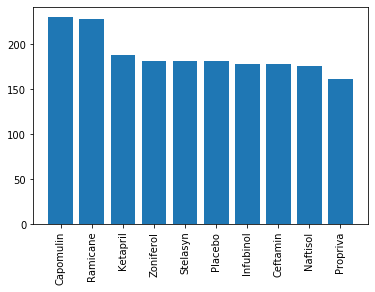

In [107]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pyplot.
#timepoint = Merged_mouse_study['Timepoint']

plt.bar(mice_count.index.values, mice_count.values)
plt.xticks(rotation=90)


## Pie Plots

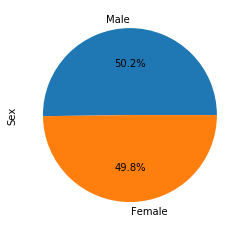

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_plt = mouse_metadata["Sex"].value_counts()
mouse_plt.plot(kind="pie",autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x28201bc9400>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

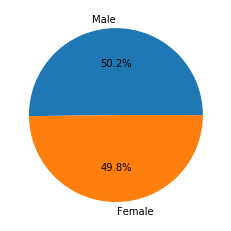

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_plt.values,labels=mouse_plt.index.values,autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_max= combined_data.groupby(["Mouse ID"]).max()
mouse_max= mouse_max.reset_index()
# Merge  original df
new_combined_data = mouse_max[['Mouse ID','Timepoint']].merge(combined_data,on=['Mouse ID','Timepoint'],how="left")
new_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [116]:
Infubinol = new_combined_data.loc[new_combined_data["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
Capomulin = new_combined_data.loc[new_combined_data["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
Ramicane = new_combined_data.loc[new_combined_data["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
Ketapril = new_combined_data.loc[new_combined_data["Drug Regimen"]=="Ketapril"]["Tumor Volume (mm3)"]


In [117]:
# Quantitatively determine capomulin outliers
c_quartiles = Capomulin.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
print(f"Capomulin potential outliers: {Capomulin.loc[(Capomulin < c_lower_bound) | (Capomulin > c_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [119]:
# Quantitatively determine Ramicane outliers
r_quartiles = Ramicane.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq
r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Ramicane potential outliers: {Ramicane.loc[(Ramicane < r_lower_bound) | (Ramicane > r_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [118]:
# Quantitatively determine Infubinol outliers
i_quartiles = Infubinol.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
print(f"Infubinol potential outliers: {Infubinol.loc[(Infubinol < i_lower_bound) | (Infubinol > i_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [120]:
# Quantitatively determine Ketapril outliers
k_quartiles = Ketapril.quantile([.25,.5,.75])
k_lowerq = k_quartiles[0.25]
k_upperq = k_quartiles[0.75]
k_iqr = k_upperq-k_lowerq
k_lower_bound = k_lowerq - (1.5*k_iqr)
k_upper_bound = k_upperq + (1.5*k_iqr)
print(f"Ketapril potential outliers: {Ketapril.loc[(Ketapril < k_lower_bound) | (Ketapril > k_upper_bound)]}")

Ketapril potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x28201f9c208>,
 'caps': [<matplotlib.lines.Line2D at 0x28201f9c828>,
 'boxes': [<matplotlib.lines.Line2D at 0x28201f8ceb8>,
 'medians': [<matplotlib.lines.Line2D at 0x28201f9ceb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x28201fa7240>,
 'means': []}

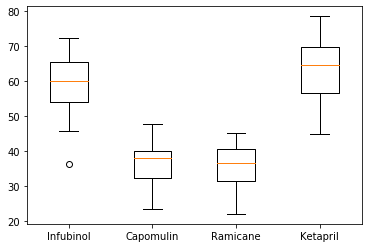

In [124]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Tumor_Volume = new_combined_data['Tumor Volume (mm3)']
#isolate top 4 medications
#ax1.set_title('Tumor Vol')
#ax1.set_ylabel('Vol mm3')
#ax1.boxplot(Tumor_Volume)
#plt.show()
plt.boxplot([Infubinol, Capomulin, Ramicane, Ketapril], labels = ["Infubinol", "Capomulin", "Ramicane", "Ketapril"])

## Line and Scatter Plots

In [128]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
mouseb128 =  Capomulin_df.loc[Capomulin_df["Mouse ID"]=="b128"]

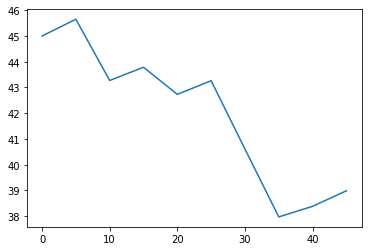

In [129]:
plt.plot(mouseb128["Timepoint"],mouseb128["Tumor Volume (mm3)"])


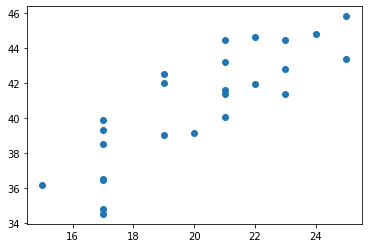

In [132]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
cap_avg = Capomulin_df.groupby("Mouse ID").mean()
plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


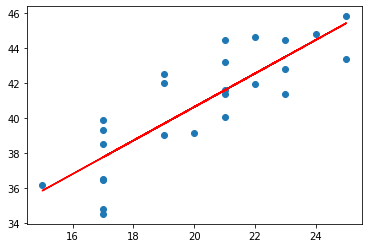

In [133]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
y_values = cap_avg['Weight (g)']*model[0]+model[1]
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_values,color="red")
